# CLUSTERING ANALYSIS 

## Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.


## import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## Column rename.

In [3]:
df.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)
df
#Set ID as Index Column
df.set_index('ID',inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


## 2. Data Exploration
### 
Descriptive Statistics

In [4]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [6]:
# different cc_miles have different max values.
# so, we want to check what values these columns can take

print('unique_cc1',df.cc1_miles.unique())
print('unique_cc2',df.cc2_miles.unique())
print('unique_cc3',df.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


##  Missing Values

In [7]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

### Observation: Notice there are no missing values in the dataset¶

## Duplicated Values

In [8]:
df[df.duplicated()]


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [9]:
df[df.duplicated()].shape

(1, 11)

In [10]:
df=df.drop_duplicates()

df[df.duplicated()].shape

(0, 11)

 ### Observation: There are duplicated values in the dataset
Hence, we dropped those values

## 3 Exploratory Data Analysis

## plot histogram of the features 

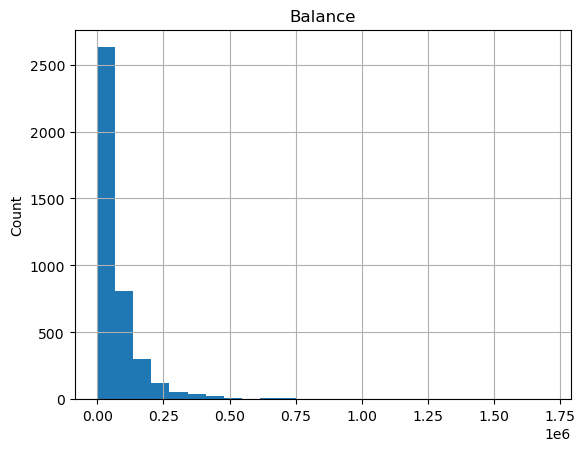

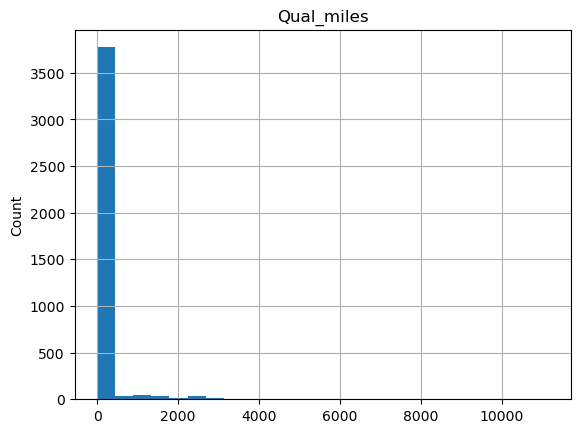

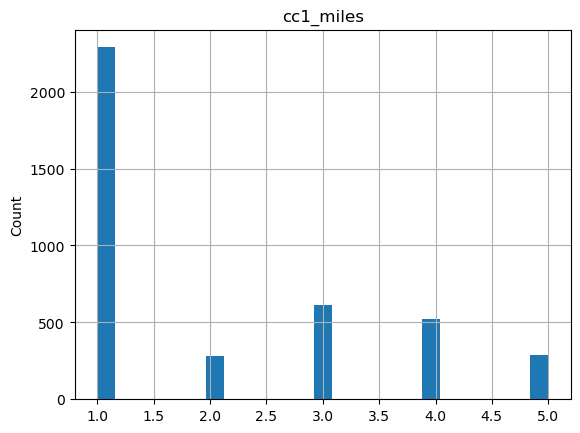

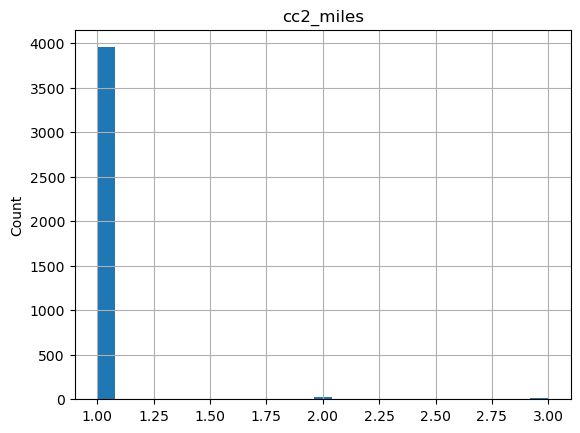

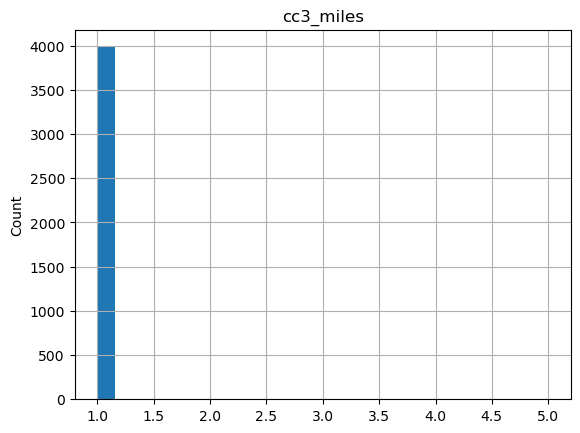

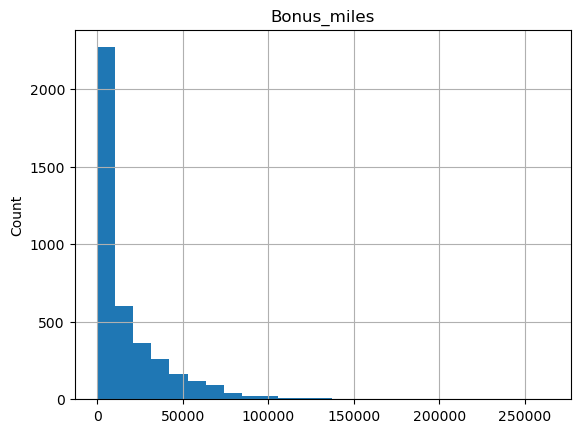

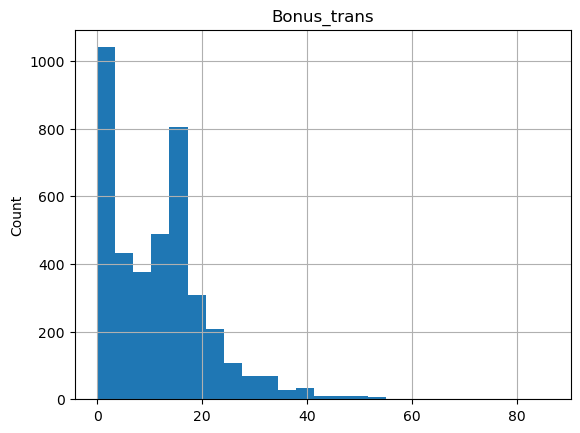

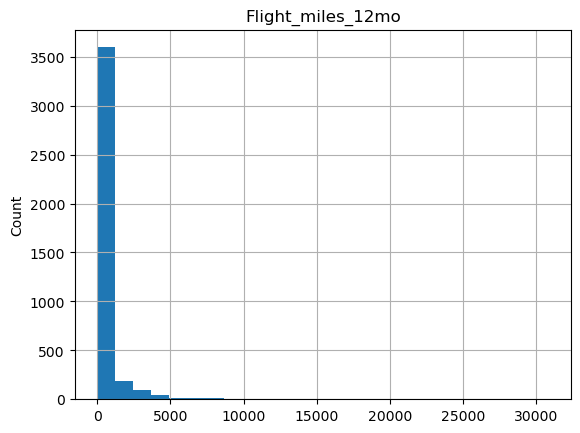

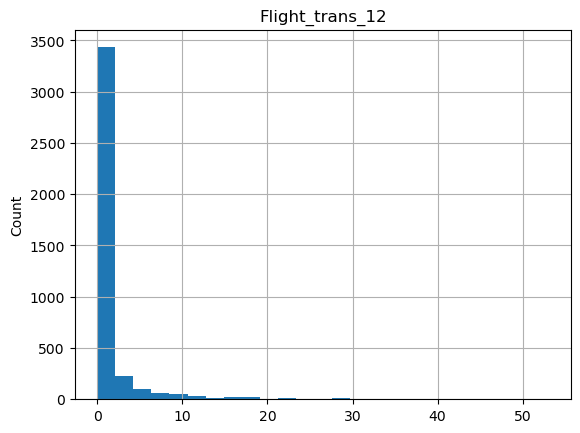

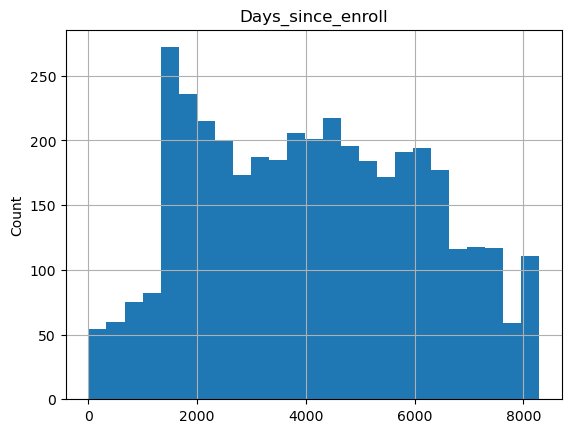

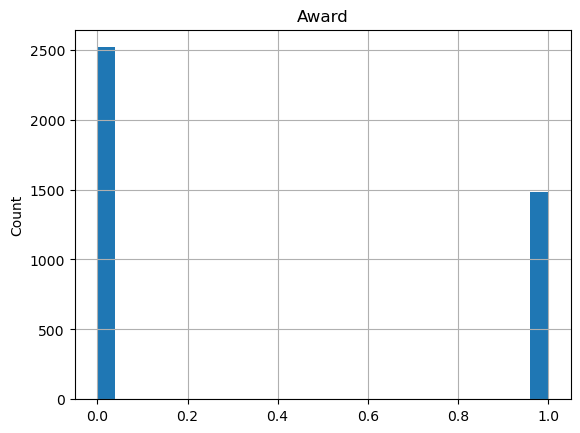

In [11]:
for feature in df.columns:
    df=df.copy()
    df[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

##  Outliers Detection

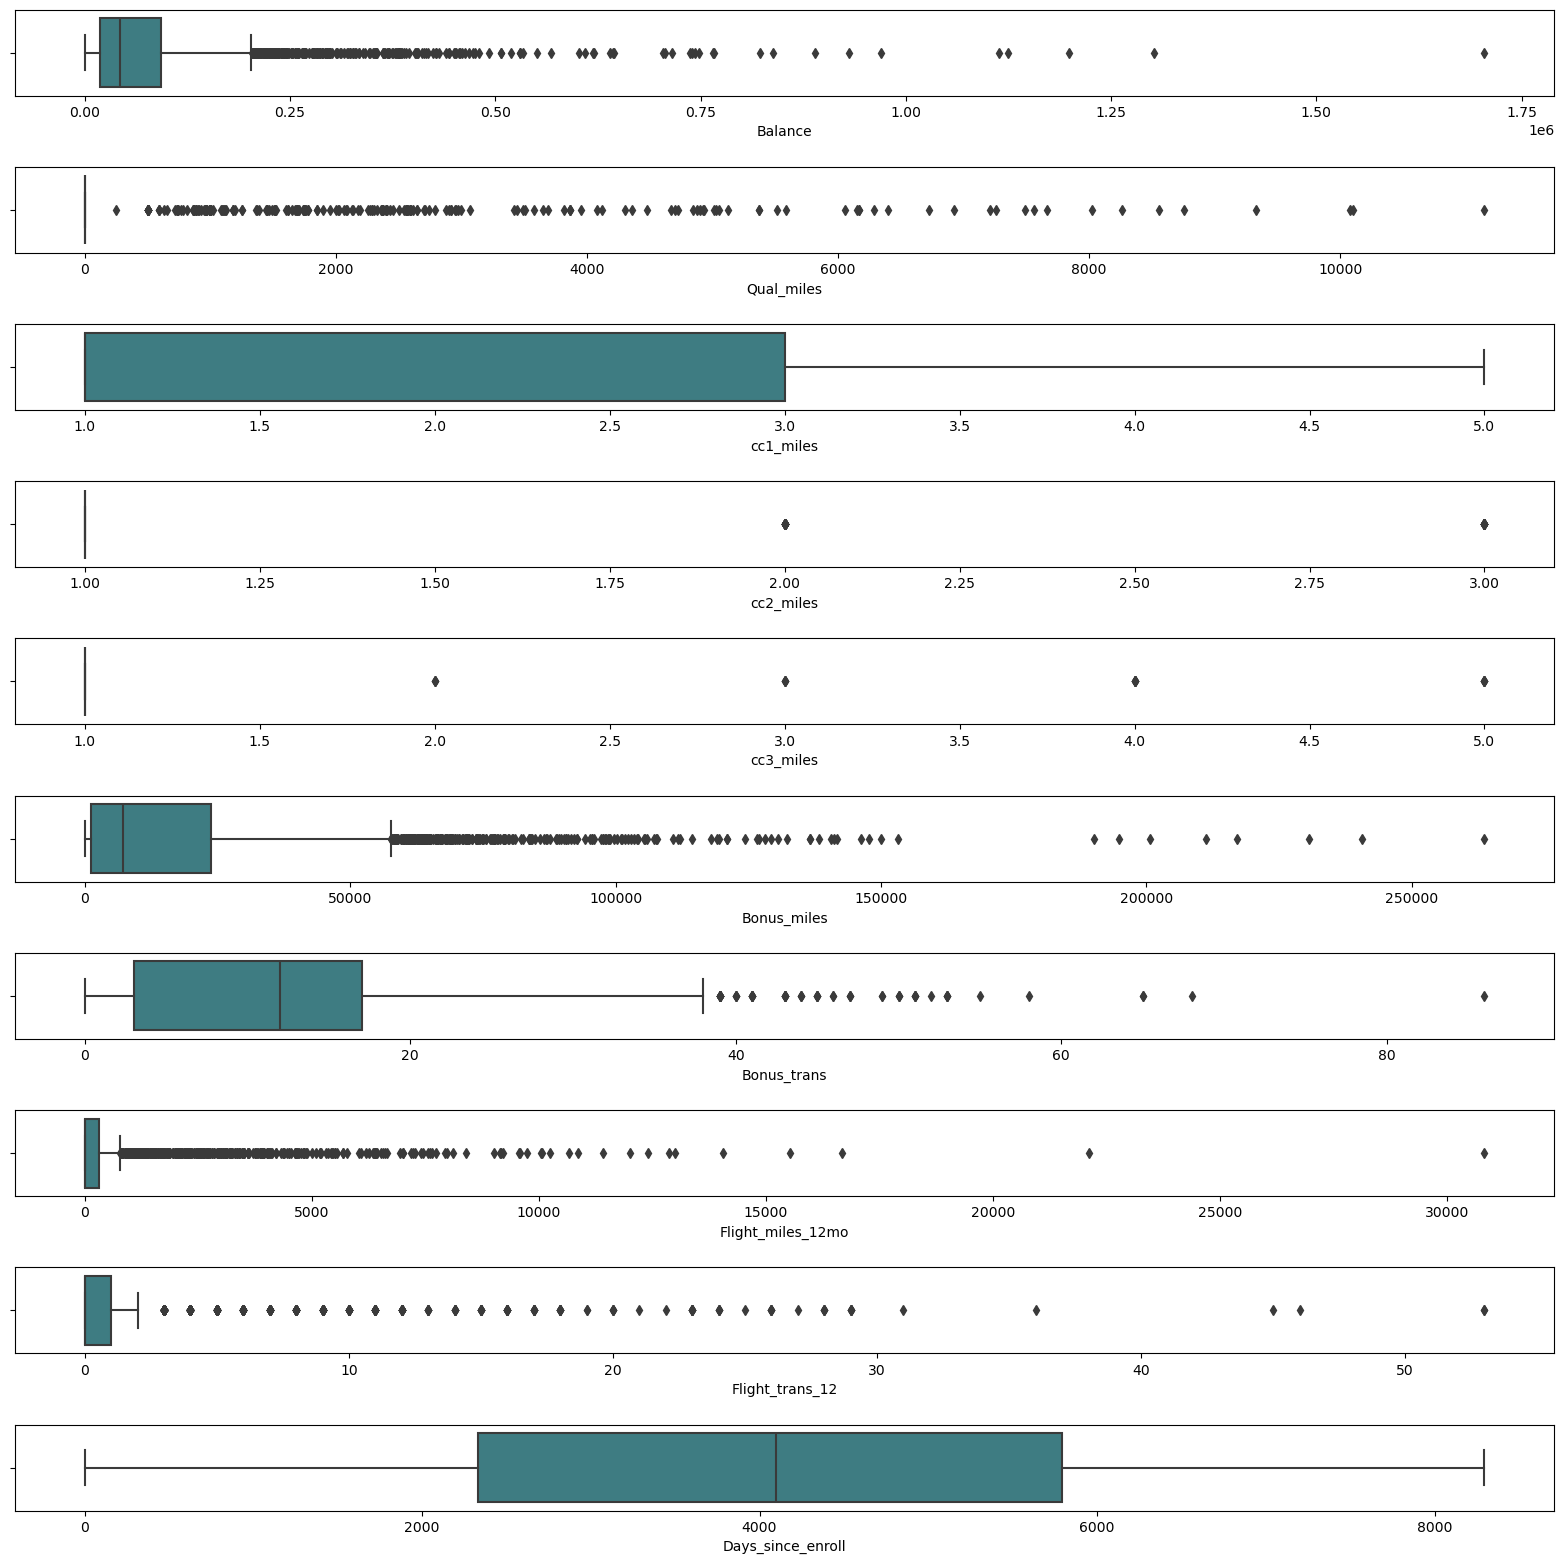

In [12]:
df=df.copy() 
fig, axes=plt.subplots(10,1,figsize=(16,16),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=df,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=df,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=df,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=df,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=df,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=df,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=df,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

<Axes: >

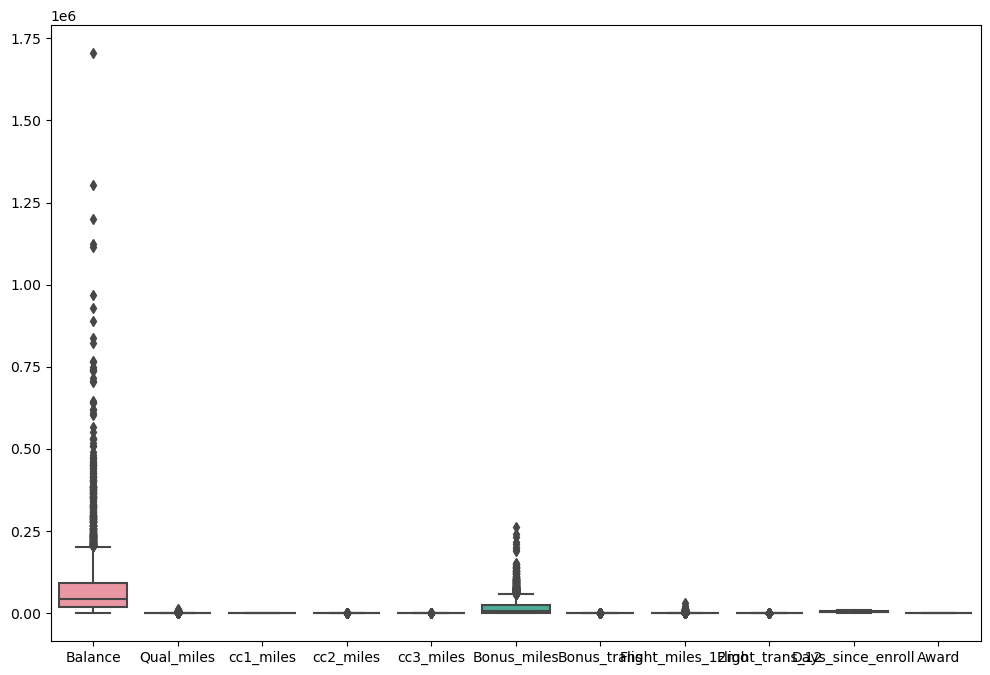

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

## 4 Data Visualization

Text(0.5, 1.0, 'Whether the client has a Award or not ')

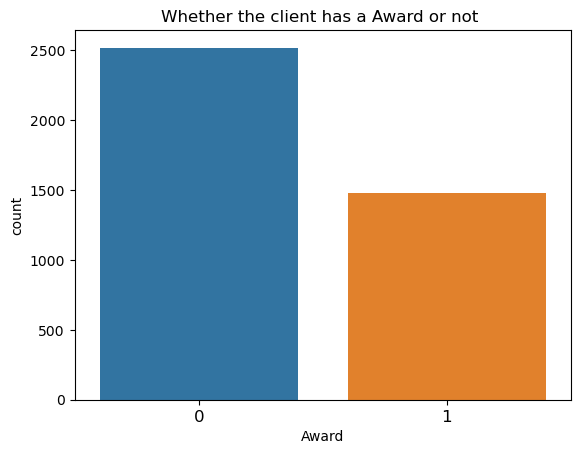

In [14]:
sns.countplot(x='Award', data=df, 
              order=df['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not ')

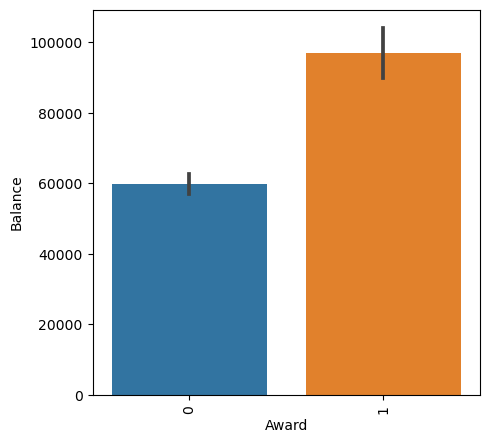

In [15]:
# Balance : Number of miles eligible for award travel

plt.figure(figsize = (5,5))
Balance = df[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

In [16]:
# what is correlated with Balance?

corr_matrix = df.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403410
cc1_miles            0.338252
Bonus_trans          0.324797
Days_since_enroll    0.262975
Flight_trans_12      0.255656
Flight_miles_12mo    0.217509
Award                0.178380
Qual_miles           0.108696
cc3_miles            0.035234
cc2_miles           -0.008822
Name: Balance, dtype: float64

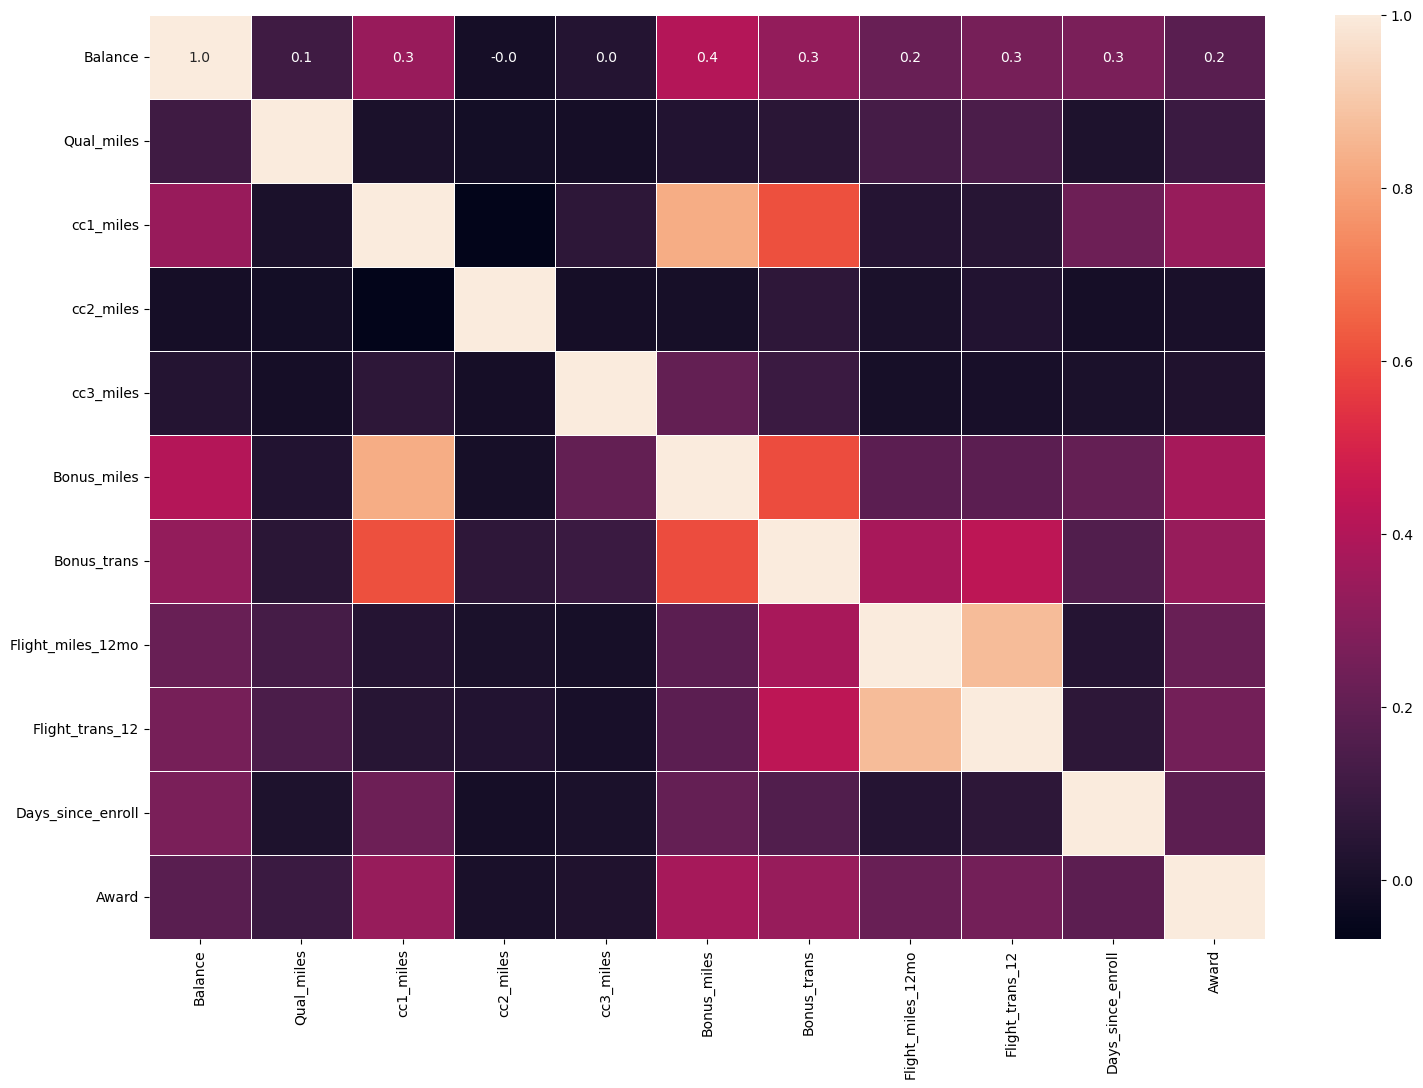

In [17]:
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

Unique points in this correlation matrix:

flight_trans_12 is positively correlated with flight_miles_12m
o
bonus_trans is positively correlated with cc1_mil
es
bonus_trans is positively correlated with bonus_mi
les
bonus_miles is positively correlated with cc1_m
credit card

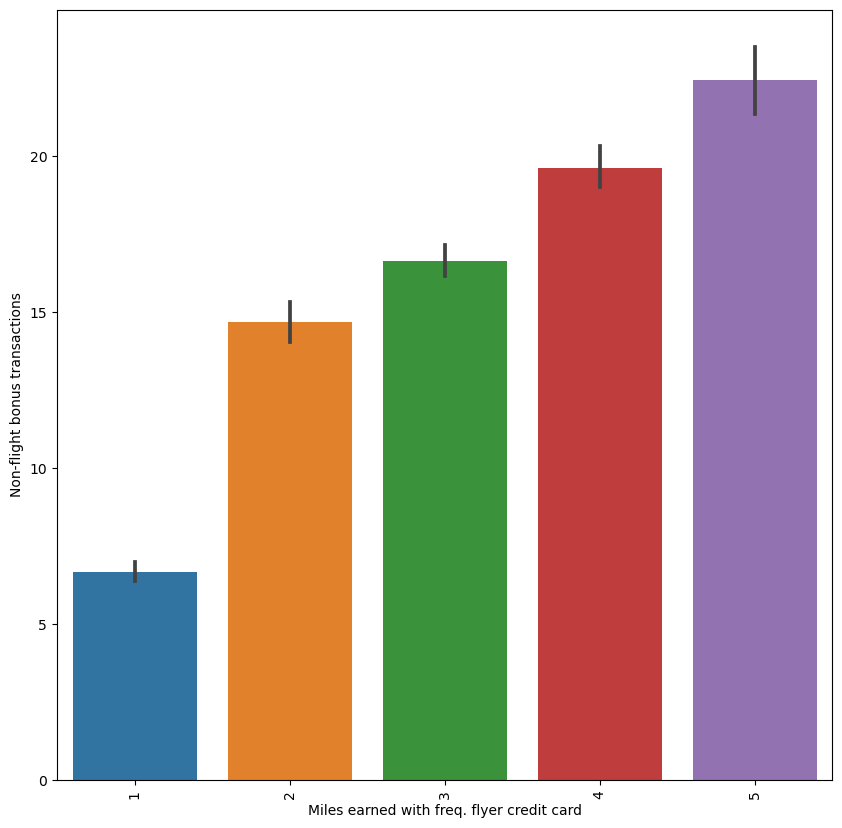

In [18]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize = (10,10))
sorted_df = df[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_df)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

### People who fly more frequently use bonus transactions more

## 5. Data Preprocessing

## Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()
scaler_df=scaler.fit_transform(df)
scaler_df

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

## Normalizing the data

In [21]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df)
minmax_df

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

## agglomerative clustering

In [22]:
hc=AgglomerativeClustering(n_clusters=3,linkage='complete')

In [23]:
hc.fit(scaler_df)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [24]:
hc_pred=hc.fit_predict(scaler_df)
hc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
pd.DataFrame(hc_pred,columns=['cluster_no'])

,cluster_no
0,0
1,0
2,0
3,0
4,0
...,...
3993,0
3994,0
3995,0
3996,0


In [26]:
df['cluster_no']=pd.DataFrame(hc_pred,columns=['cluster_no'])
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_no
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0.0
2,19244,0,1,1,1,215,2,0,0,6968,0,0.0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0.0
4,14776,0,1,1,1,500,1,0,0,6952,0,0.0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,NaN
4018,64385,0,1,1,1,981,5,0,0,1395,1,NaN
4019,73597,0,3,1,1,25447,8,0,0,1402,1,NaN


<Axes: xlabel='Balance', ylabel='Bonus_trans'>

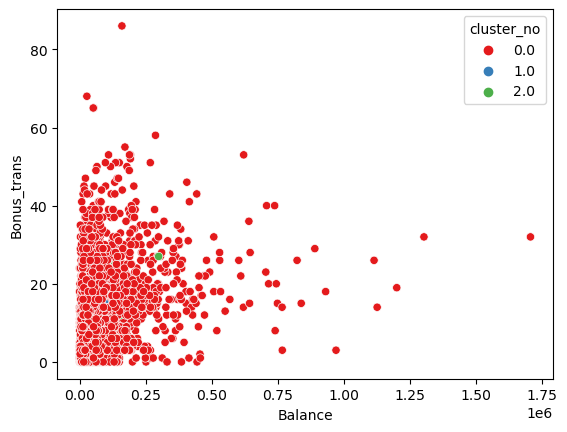

In [27]:
sns.scatterplot(x=df['Balance'],y=df['Bonus_trans'],hue=df['cluster_no'],palette='Set1')

In [28]:
import scipy.cluster.hierarchy as sch

In [29]:
sch.linkage(scaler_df,optimal_ordering=True,method='average')

array([[2.67900000e+03, 2.67800000e+03, 2.26429338e-03, 2.00000000e+00],
       [3.99700000e+03, 3.49100000e+03, 2.70567023e-03, 2.00000000e+00],
       [3.70400000e+03, 3.72900000e+03, 3.14959881e-03, 2.00000000e+00],
       ...,
       [7.99000000e+03, 7.98500000e+03, 1.67814245e+01, 3.99300000e+03],
       [2.75000000e+02, 7.99200000e+03, 1.79763340e+01, 3.99400000e+03],
       [7.99100000e+03, 7.99300000e+03, 2.05426071e+01, 3.99800000e+03]])

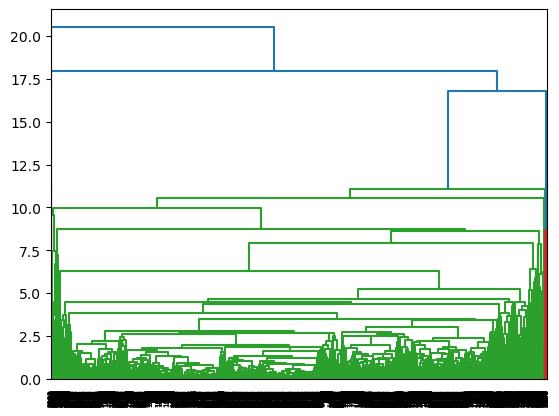

In [30]:
sch.dendrogram(sch.linkage(scaler_df,optimal_ordering=True,method='average'))
plt.show()


In [31]:
from sklearn.metrics import silhouette_score
silhouette_score(scaler_df,hc.fit_predict(scaler_df))

0.7760498283333268

## KMeans clustering

In [43]:
from sklearn.cluster import KMeans

In [68]:
kc=KMeans(2,random_state=42,n_init=10)


In [69]:
kc_pred=kc.fit_predict(minmax_df)
kc_pred

array([1, 1, 1, ..., 0, 1, 1])

In [70]:
df['cluster_no']=pd.DataFrame(kc_pred,columns=['cluster_no'])

<Axes: xlabel='Balance', ylabel='Bonus_trans'>

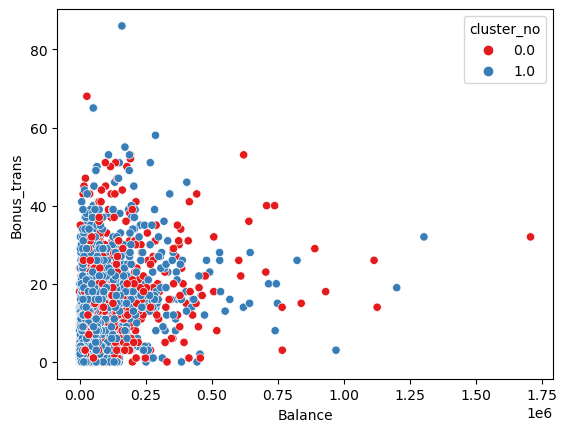

In [71]:
sns.scatterplot(x=df['Balance'],y=df['Bonus_trans'],hue=df['cluster_no'],palette='Set1')

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
wcss=[]
for i in range (1,20):
    kc=KMeans(n_clusters=i,random_state=42)
    kc.fit_predict(minmax_df)
    wcss.append(kc.inertia_)
    
wcss

[1830.4680233661593,
 823.5583625482057,
 625.1109608846494,
 436.642089093596,
 348.9348563312635,
 315.14249223137153,
 287.7224333618692,
 263.1862983083349,
 246.30105170844502,
 226.10478142072378,
 215.90350129195355,
 207.7234269343499,
 195.16130914144748,
 190.0602641092543,
 179.32345679960147,
 172.30054125446736,
 169.22979909004385,
 163.90629839811436,
 160.55799382222108]

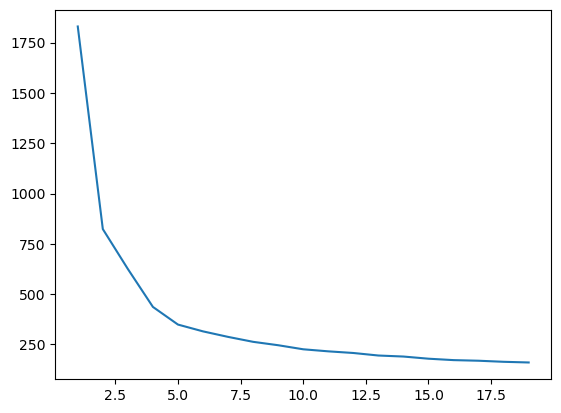

In [60]:
plt.plot(range(1,20),wcss)

In [72]:
silhouette_score(minmax_df,kc.fit_predict(minmax_df))

0.535888544052936

## DBSCAN clustering

In [73]:
from sklearn.cluster import DBSCAN

In [111]:
dbscan=DBSCAN(eps=4,min_samples=20)
dbscan.fit(scaler_df)

DBSCAN(eps=4, min_samples=20)

In [112]:
dbscan.fit_predict(scaler_df)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [113]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<Axes: xlabel='Balance', ylabel='Bonus_trans'>

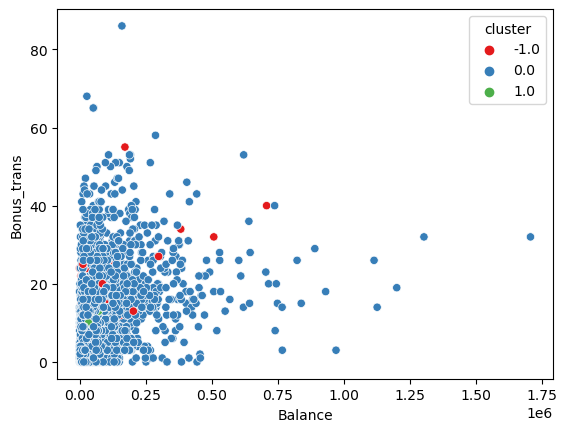

In [114]:
sns.scatterplot(x=clusterd['Balance'],y=clusterd['Bonus_trans'],hue=clusterd['cluster'],palette='Set1')

In [115]:
from sklearn.metrics import silhouette_score

In [116]:
silhouette_score(scaler_df,dbscan.fit_predict(scaler_df))

0.5374573093151761

##  Conclusion:
I have applied EDA to analyze dataset.Discovered correlation between diff variables and found colinearity.
Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively.
I have used & analyzed two clustering techniques here..i) KMeans, ii) Hierarchical Clusterig & iii) DBSCAN.
By applying clustering on diff. PCA obtained with diff transformation data shows fluctuation in model score. So finally the Standard Scaler found less score so not used for further model building
